# Proyek Analisis Data: [Air-quality]
- **Nama:** Ali Purnomo Shidiq
- **Email:** ali.purns122@gmail.com
- **ID Dicoding:** ali_poernomo

## Pertanyaan Bisnis

- Bedasarkan data yang ada, apakah temprature pada kota changping meningkat seiring bertambahnya zat-zat polutan(PM2.5,PM10) ?
- Bagaimanakah tren curah hujan yang terjadi pada setiap tahunnya ?
- Bagaimanakah pembagian golongan temprature yang terjadi pada kota changping ?
- Seberapa banyak frekuensi terjadinya pembagian temprature pada setiap tahun ?

## Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

## Data Wrangling

### Gathering Data

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Air-quality-dataset.zip to Air-quality-dataset.zip
User uploaded file "Air-quality-dataset.zip" with length 7959991 bytes


In [3]:
!unzip /content/Air-quality-dataset.zip

Archive:  /content/Air-quality-dataset.zip
   creating: PRSA_Data_20130301-20170228/
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-201702

In [4]:
df_changping=pd.read_csv('/content/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Data yang tersimpan pada data set Air Quality adalah data berbagai macam zat polusi yang terdapat pada banyak kota serta atribut lainnya yang diduga memiliki pengaruh terhadap zat polusi.
- Dikarenakan didalam dataset hanya terdiri dari data banyak kota-kota dengan nilai kolom yang sama, pada praktik ini saya hanya akan fokus terhadap 1 kota yaitu kota changping.

### Assessing Data

In [5]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df_changping.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [7]:
missing_percentage = df_changping.isnull().sum() * 100 / len(df_changping)
print(missing_percentage)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.207392
PM10       1.659822
SO2        1.791011
NO2        1.902236
CO         4.337782
O3         1.722564
TEMP       0.151152
PRES       0.142596
DEWP       0.151152
RAIN       0.145448
wd         0.399270
WSPM       0.122633
station    0.000000
dtype: float64


In [8]:
df_changping.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [9]:
df_changping.duplicated().sum()

0

**Insight:**
- Data yang terdapat pada beberapa kolum terdapat sedikit missing,data missing sudah di cantumkan dalam persen dalam pengkodean diatas.
- Terdapat 0 duplikat di dalam Dataframe
- Dataframe mempunyai rentang waktu dari tahun 2013 samapi dengan 2017
- Temprature pada kota changping berentang antara -16 sama 41 derajat celcius.

### Cleaning Data

In [10]:
df_changping = df_changping.interpolate(method='linear', limit_direction='forward', axis=0)
df_changping.isna().sum()

<ipython-input-10-34266f056224>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_changping = df_changping.interpolate(method='linear', limit_direction='forward', axis=0)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [11]:
mode_wd = df_changping['wd'].mode()[0]
df_changping['wd'] = df_changping['wd'].fillna(mode_wd)
df_changping.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Pada tahap Cleaning data, dapat digunakan metode interpolasi,dikarenakan metode ini akan memperkirakan nilai yang sesuai pada data yang berkonteks dalam Time Series.
- Dikarenakan komlum wd(arah mata angin) berisi object maka metode yang akan digukanakan dalam mengisi data missing kita bedakan menjadi menggunakan nilai modus.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
df_changping.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,NaN,1.854871,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752357,NaN,1.310748,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [13]:
df_changping['date_time'] = pd.to_datetime(df_changping[['year', 'month', 'day', 'hour']])
rain_by_datetime = df_changping.groupby('date_time')['RAIN'].sum()
print(rain_by_datetime)

date_time
2013-03-01 00:00:00    0.0
2013-03-01 01:00:00    0.0
2013-03-01 02:00:00    0.0
2013-03-01 03:00:00    0.0
2013-03-01 04:00:00    0.0
                      ... 
2017-02-28 19:00:00    0.0
2017-02-28 20:00:00    0.0
2017-02-28 21:00:00    0.0
2017-02-28 22:00:00    0.0
2017-02-28 23:00:00    0.0
Name: RAIN, Length: 35064, dtype: float64


In [14]:
nilai_temp= df_changping.groupby(by="year")['TEMP'].agg(['count', 'min', 'max'])
print(nilai_temp)

      count        min   max
year                        
2013   7344  -9.600000  37.9
2014   8760 -10.900000  41.4
2015   8760 -10.300000  39.2
2016   8784 -16.600000  38.1
2017   1416  -9.966667  15.6


In [15]:
correlation_temp = df_changping[['TEMP', 'PM2.5', 'PM10']].corr()
print(correlation_temp)

           TEMP     PM2.5      PM10
TEMP   1.000000 -0.113130 -0.091554
PM2.5 -0.113130  1.000000  0.859519
PM10  -0.091554  0.859519  1.000000


In [16]:
nilai_rain= df_changping.groupby(by="year")['RAIN'].agg(['count', 'min', 'max'])
print(nilai_rain)

      count  min   max
year                  
2013   7344  0.0  25.3
2014   8760  0.0  21.6
2015   8760  0.0  52.1
2016   8784  0.0  22.7
2017   1416  0.0   0.6


**Insight:**
- Jika bedasarkan correlation_temp hubungan antara temprature dengan zat polutan PM 2.5 dan PM 10 memiliki hubungan yang cukup lemah dan bernilai negatif.
- Nilai temprature teringgi dan terendah terdapat pada tahun 2014 sepanjang tahun yang sudah terjadi.
- Pada tahun 2015 terdapat cuarah hujan yang tertinggi.
- Pada tahun 2014 terjadi curah hujan yang terkecil.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

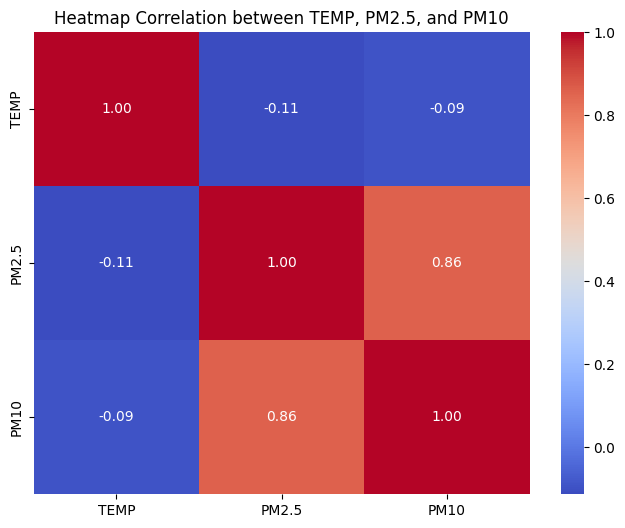

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_temp, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation between TEMP, PM2.5, and PM10')
plt.show()

### Pertanyaan 2:

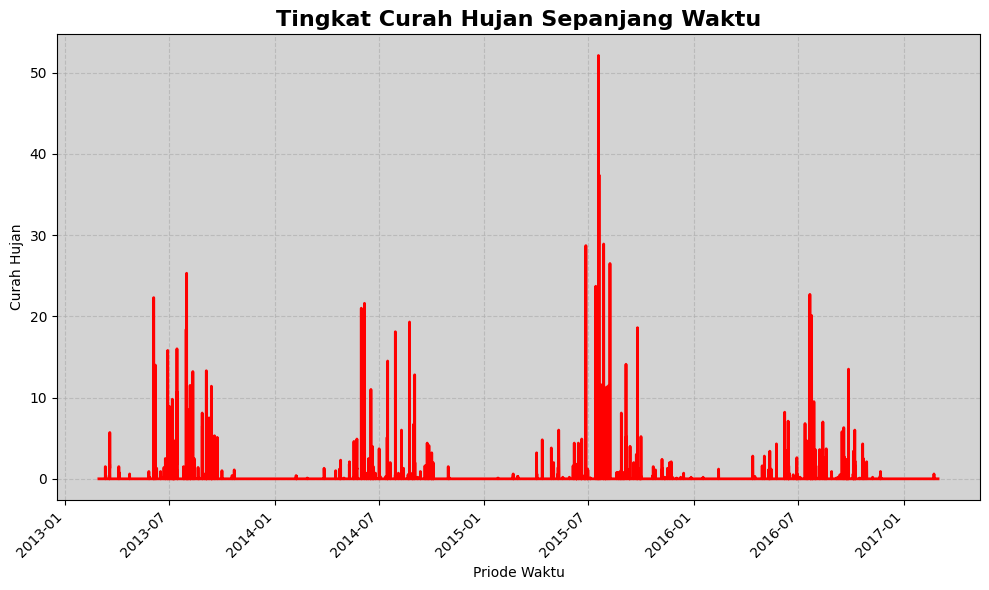

In [38]:
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.plot(df_changping['date_time'], df_changping['RAIN'], color='red', linewidth=2)
plt.xlabel('Priode Waktu')
plt.ylabel('Curah Hujan')
plt.title('Tingkat Curah Hujan Sepanjang Waktu', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Pada Grafik Heatmap yang sudah di visualisasikan hubungan antara peningkatan temprature dengan zat polutan (PM2.5 dan PM10) bernilai negatif yaitu -0.11 dan -0.09.
- Pada Grafik tingkat curah hujan, terdapat fakta bahwa curah hujan tertinggi berda pada periode waktu pertengan tahun 2015,curah hujan tersebut mendapatkan point 50.
- Curah hujan pada tahun 2017 dinilai sangat rendah dikarenakan jumlah data yang terdapat dataframe masih sangat rendah.

## Analisis Lanjutan

### Pertanyaan 3:

In [41]:
Q1 = df_changping['TEMP'].quantile(0.25)
Q2 = df_changping['TEMP'].quantile(0.5)
Q3 = df_changping['TEMP'].quantile(0.75)
df_changping['temp_cluster'] = pd.cut(df_changping['TEMP'], bins=[-float('inf'), Q1, Q3, float('inf')], labels=['rendah', 'sedang', 'tinggi'])
df_changping.groupby('temp_cluster').describe()

<ipython-input-41-ee40646e25d6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_changping.groupby('temp_cluster').describe()


No                                                     \
                count          mean     min       25%      50%       75%   
temp_cluster                                                               
rendah         8825.0  20214.538810     1.0   8884.00  17768.0  26305.00   
sedang        17561.0  16646.978874    12.0   7863.00  16994.0  26056.00   
tinggi         8678.0  16596.989975  1043.0  10237.25  18796.0  27758.75   

                                        year               ...  WSPM  \
                  max           std    count         mean  ...   max   
temp_cluster                                               ...         
rendah        35025.0  10023.794001   8825.0  2015.040340  ...  10.0   
sedang        35064.0  10089.802788  17561.0  2014.541256  ...   9.6   
tinggi        31507.0   9800.485408   8678.0  2014.523853  ...   9.3   

                       date_time                                 \
                   std     count                           mean   
temp_cluster                                                      
rendah        1.499383      8825  2015-06-21 05:32:19.716714240   
sedang        1.293824     17561  2015-01-23 13:58:43.945105408   
tinggi        1.115736      8678  2015-01-21 11:59:23.908734720   

                                                                             \
                              min                  25%                  50%   
temp_cluster                                                                  
rendah        2013-03-01 00:00:00  2014-03-06 03:00:00  2015-03-11 07:00:00   
sedang        2013-03-01 11:00:00  2014-01-22 14:00:00  2015-02-07 01:00:00   
tinggi        2013-04-13 10:00:00  2014-05-01 12:15:00  2015-04-23 03:00:00   

                                                             
                              75%                  max  std  
temp_cluster                                                 
rendah        2016-03-01 00:00:00  2017-02-27 08:00:00  NaN  
sedang        2016-02-19 15:00:00  2017-02-28 23:00:00  NaN  
tinggi        2016-04-30 13:45:00  2016-10-03 18:00:00  NaN  

[3 rows x 136 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


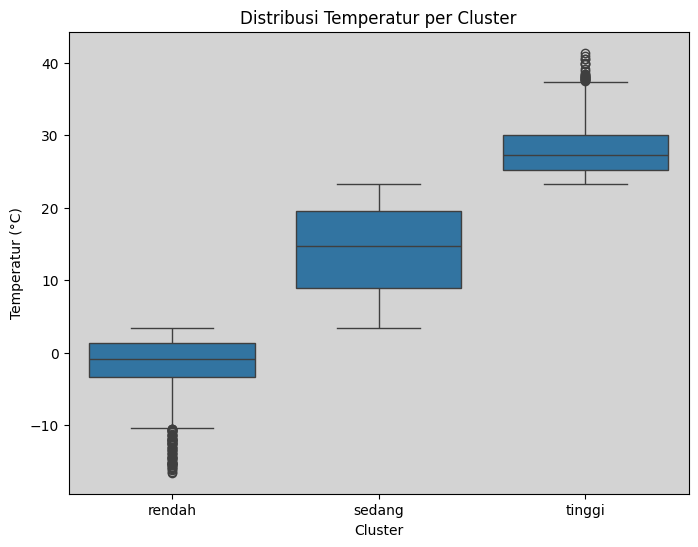

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='temp_cluster', y='TEMP', data=df_changping)
plt.title('Distribusi Temperatur per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Temperatur (°C)')
plt.show()

**Insight**
- Dikarenakan didalam pertanyaaan ke 3 membutuhkan penggolongan terhadap kolom temprature maka pada pertanyaan ini kita menggunakan metode clustering yang bedasarkan Q1,Q2,dan Q3.
- Pembagian terdiri atas temprature rendah,sedang ,dan tinggi.

### Pertanyaan 4:

<ipython-input-45-b536fea97d6c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cluster_freq = df_changping.groupby(['year', 'temp_cluster'])['temp_cluster'].count().reset_index(name='frequency')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

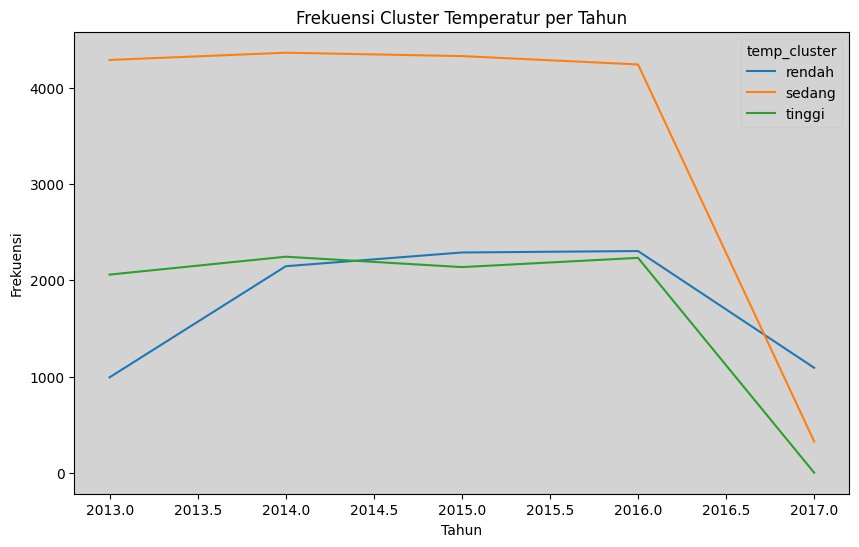

In [45]:
temp_cluster_freq = df_changping.groupby(['year', 'temp_cluster'])['temp_cluster'].count().reset_index(name='frequency')
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='frequency', hue='temp_cluster', data=temp_cluster_freq)
plt.title('Frekuensi Cluster Temperatur per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.show()

**Insigt**
- Temparatur sedang paling sering terjadi di sepanjang tahun,kecuali pada tahun 2017.
- Jumlah Frekuensi tempratur tinggi dan  rendah mengalami nilai yang cenderung stabil pada tahun 2014 sampai 2016.

## Conclusion

- Peningkatan tempratur yang terjadi pada kota changping tidak disebabkan oleh peningkatan zat pm 2.5 dan pm10 hal tersebut didasarkan pada corelasi data yang bersifat negatif.
- Tren curah hujan pada kota changping mengalami peningkatan yang cukup drastis pada tahun 2015,dimana hampir terjadi peningkatan 2 kali lebih tinggi dari tahun sebelumnya, sementara pada tahun lainnya tren curah hujan cenderung stabil.
- Pembagian golongan tempatur dapat dilakukan dengan membaginya menjadi 3 golong yaitu rendah sedang dan tinggi, pembagian tersebut didasarkan dengan nilai qi,q2,dan q3,pembagian ini dapat dengan mudah menilai tempatur yang terjadi pada kota changping.
- Tempratur sedang paling banyak terjadi sepanjang waktu yaitu terjadi sebanyak 4000 kali lebih, sementara tempatur lain memiliki kecenderungan untuk memiliki nilai frekuensi yang stabil pada kota changping.